In [1]:
#manipulation des données
import numpy as np
import pandas as pd 

# sklearn preprocessing pour le traitement les variables catégorielles
from sklearn.preprocessing import LabelEncoder

# Gestion du système de fichiers
import os

# Suppression des alertes 
import warnings
warnings.filterwarnings('ignore')

# matplotlib et seaborn pour les représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

pd.set_option('display.max_columns', None) #permet d'afficher toutes les colonnes

In [2]:
df = pd.read_csv('../Data/2.RFM_dataset.csv')
df

,customer_unique_id,Recency,Frequency,Monetary
0,7c396fd4830fd04220f754e42b4e5bff,27.289810,2,1.303348
1,af07308b275d755c9edb36a90c618231,14.162002,1,1.601216
2,3a653a41f6f9fc3d2a113cf8398680e8,13.051752,1,1.647432
3,7c142cf63193a1473d2e66489a9ae977,25.737451,1,1.457031
4,72632f0f9dd73dfee390c9b22eb56dd6,22.505471,1,1.220373
...,...,...,...,...
96091,6359f309b166b0196dbf7ad2ac62bb5a,33.093157,1,1.494089
96092,da62f9e57a76d978d02ab5362c509660,22.786720,1,1.663569
96093,737520a9aad80b3fbbdad19b66b37b30,28.407875,1,1.723809
96094,5097a5312c8b157bb7be58ae360ef43c,23.908753,1,1.686544


In [3]:
df_sample = df.sample(10000, replace=False)
df_sample.shape

(10000, 4)

In [4]:
X = df_sample.drop('customer_unique_id', axis=1).values
y = df_sample['customer_unique_id'].values
print(X.shape)
print(y.shape)

(10000, 3)
(10000,)


In [5]:
from sklearn import preprocessing

X_norm = preprocessing.scale(X)
print(X_norm.shape)

(10000, 3)


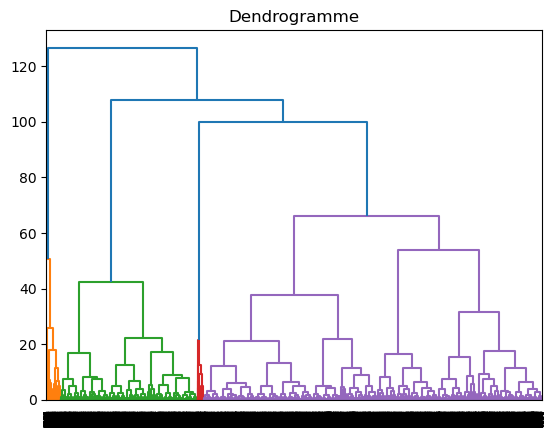

In [6]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


# Calcul de la matrice de distance
distance_matrix = linkage(X_norm, method='ward')  # Vous pouvez choisir une autre méthode si nécessaire

# Création du dendrogramme
dendrogram_plot = dendrogram(distance_matrix)

# Affichage du dendrogramme
plt.title('Dendrogramme')
plt.show()



In [7]:
df = pd.read_csv('../Data/2.RFM_dataset.csv')
df

,customer_unique_id,Recency,Frequency,Monetary
0,7c396fd4830fd04220f754e42b4e5bff,27.289810,2,1.303348
1,af07308b275d755c9edb36a90c618231,14.162002,1,1.601216
2,3a653a41f6f9fc3d2a113cf8398680e8,13.051752,1,1.647432
3,7c142cf63193a1473d2e66489a9ae977,25.737451,1,1.457031
4,72632f0f9dd73dfee390c9b22eb56dd6,22.505471,1,1.220373
...,...,...,...,...
96091,6359f309b166b0196dbf7ad2ac62bb5a,33.093157,1,1.494089
96092,da62f9e57a76d978d02ab5362c509660,22.786720,1,1.663569
96093,737520a9aad80b3fbbdad19b66b37b30,28.407875,1,1.723809
96094,5097a5312c8b157bb7be58ae360ef43c,23.908753,1,1.686544


In [8]:
from sklearn.model_selection import train_test_split

df_part1, df_part2 = train_test_split(df, test_size=0.5, random_state=42)
df_part1a, df_part2a = train_test_split(df_part1, test_size=0.5, random_state=42)
df_part1b, df_part2b = train_test_split(df_part2, test_size=0.5, random_state=42)

print(df_part1a.shape)
print(df_part2a.shape)
print(df_part1b.shape)
print(df_part2b.shape)

(24024, 4)
(24024, 4)
(24024, 4)
(24024, 4)


In [32]:
from sklearn.model_selection import train_test_split

df_part1a, df_part1b = train_test_split(df, test_size=0.75, random_state=42)
df_part1b, df_part2a = train_test_split(df_part1b, test_size=0.66, random_state=42)
df_part2a, df_part2b = train_test_split(df_part2a, test_size=0.5, random_state=42)

print(df_part1a.shape)
print(df_part1b.shape)
print(df_part2a.shape)
print(df_part2b.shape)

(24024, 4)
(24504, 4)
(23784, 4)
(23784, 4)


In [33]:
X1a = df_part1a.drop('customer_unique_id', axis=1).copy()
y1a = pd.DataFrame(df_part1a['customer_unique_id'].copy())

print(X1a.shape)
print(y1a.shape)

(24024, 3)
(24024, 1)


In [34]:
X2a = df_part2a.drop('customer_unique_id', axis=1).copy()
y2a = pd.DataFrame(df_part2a['customer_unique_id'].copy())

print(X2a.shape)
print(y2a.shape)

(23784, 3)
(23784, 1)


In [35]:
X1b = df_part1b.drop('customer_unique_id', axis=1).copy()
y1b = pd.DataFrame(df_part1b['customer_unique_id'].copy())

print(X1b.shape)
print(y1b.shape)

(24504, 3)
(24504, 1)


In [36]:
X2b = df_part2b.drop('customer_unique_id', axis=1).copy()
y2b = pd.DataFrame(df_part2b['customer_unique_id'].copy())

print(X2b.shape)
print(y2b.shape)

(23784, 3)
(23784, 1)


In [37]:
from sklearn import preprocessing

X_norm1a = preprocessing.scale(X1a)
X_norm1b = preprocessing.scale(X1b)
X_norm2a = preprocessing.scale(X2a)
X_norm2b = preprocessing.scale(X2b)

print(X_norm1a.shape)
print(X_norm1b.shape)
print(X_norm2a.shape)
print(X_norm2b.shape)

(24024, 3)
(24504, 3)
(23784, 3)
(23784, 3)


In [38]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 5
CAH = AgglomerativeClustering(n_clusters=n_clusters)

In [39]:
clusters1a = CAH.fit_predict(X_norm1a)

In [40]:
clusters2a = CAH.fit_predict(X_norm2a)

In [41]:
clusters1b = CAH.fit_predict(X_norm1b)

In [42]:
clusters2b = CAH.fit_predict(X_norm2b)

In [43]:
df1 = pd.merge(y1a, X1a, left_index=True, right_index=True)
df2 = pd.merge(y1b, X1b, left_index=True, right_index=True)
df3 = pd.merge(y2a, X2a, left_index=True, right_index=True)
df4 = pd.merge(y2b, X2b, left_index=True, right_index=True)

In [44]:
df1['Cluster'] = clusters1a
df2['Cluster'] = clusters1b
df3['Cluster'] = clusters2a
df4['Cluster'] = clusters2b

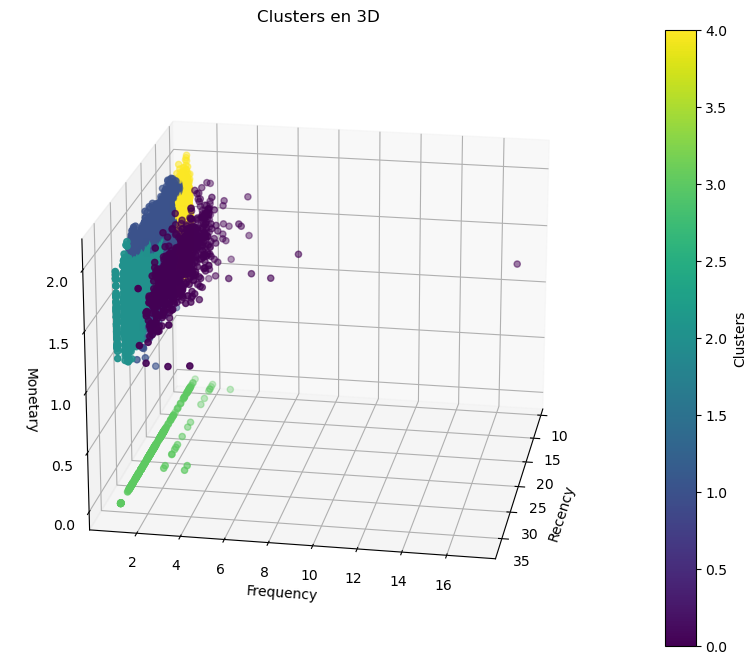

In [45]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df1['Recency'], df1['Frequency'], df1['Monetary'], c=df1['Cluster'], cmap='viridis')

fig.colorbar(scatter, ax=ax, label='Clusters')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

ax.view_init(azim=10, elev=20)

plt.title('Clusters en 3D')
plt.show()

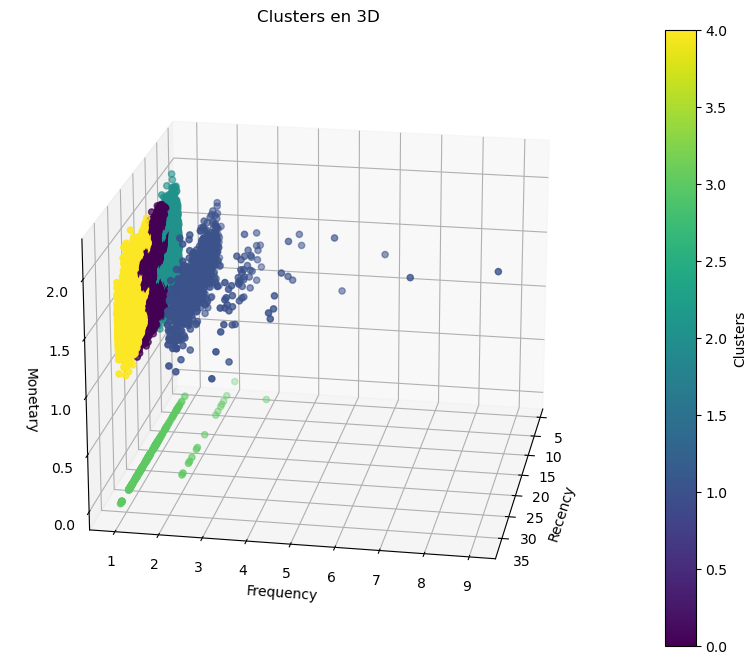

In [46]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df2['Recency'], df2['Frequency'], df2['Monetary'], c=df2['Cluster'], cmap='viridis')

fig.colorbar(scatter, ax=ax, label='Clusters')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

ax.view_init(azim=10, elev=20)

plt.title('Clusters en 3D')
plt.show()

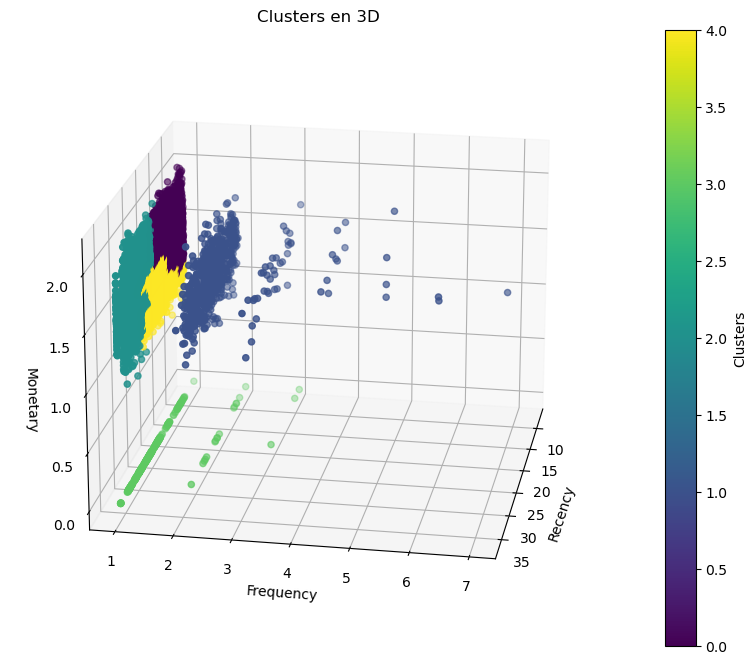

In [47]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df3['Recency'], df3['Frequency'], df3['Monetary'], c=df3['Cluster'], cmap='viridis')

fig.colorbar(scatter, ax=ax, label='Clusters')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

ax.view_init(azim=10, elev=20)

plt.title('Clusters en 3D')
plt.show()

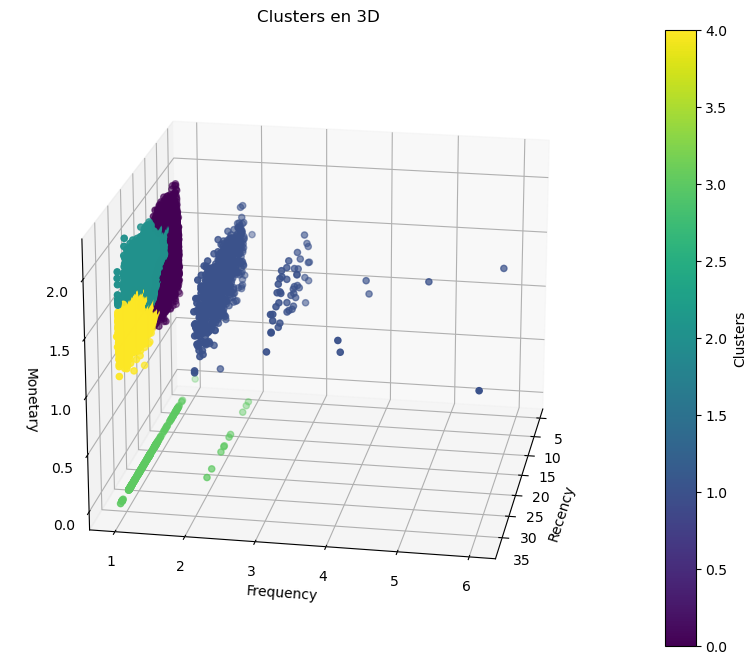

In [48]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df4['Recency'], df4['Frequency'], df4['Monetary'], c=df4['Cluster'], cmap='viridis')

fig.colorbar(scatter, ax=ax, label='Clusters')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

ax.view_init(azim=10, elev=20)

plt.title('Clusters en 3D')
plt.show()

In [59]:
liste_concat = [df1, df2, df3, df4]
df_CAH = pd.concat(liste_concat, ignore_index=True)
df_CAH

,customer_unique_id,Recency,Frequency,Monetary,Cluster
0,fa3f78a51617b896baf4cd5d51a432fd,18.098295,1,1.515771,0
1,0583a3227ed3f4f3c348e5e25b3dd9a5,25.181497,1,1.606922,4
2,9487c73a2034fc97f897f961371f8a27,22.586269,1,1.246325,0
3,7ca19647e1200895475475186a3e072e,19.654182,1,1.387672,0
4,c9a7f2bed0012cc279765776b0d8dec4,25.461366,1,1.555142,4
...,...,...,...,...,...
96091,60103f7968de921c5147233a6885185c,30.519667,1,1.964245,0
96092,ca09dd91406f345e1b9062fd69bb4414,13.656926,1,1.590220,2
96093,3167351a6b465cbd9e31e92b2d9cd9de,20.940861,1,1.552829,4
96094,676a7f78ff21f6e3794887c4ee27ca6c,20.032113,1,1.746242,4


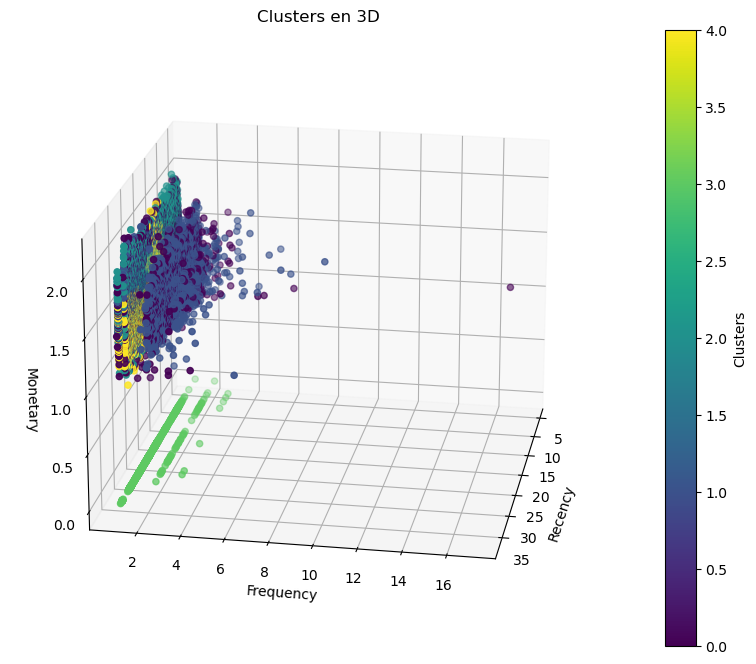

In [60]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(df['Recency'], df['Frequency'], df['Monetary'], c=df['Cluster'], cmap='viridis')

scatter = ax.scatter(df_CAH['Recency'], df_CAH['Frequency'], df_CAH['Monetary'], c=df_CAH['Cluster'], cmap='viridis')

fig.colorbar(scatter, ax=ax, label='Clusters')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

ax.view_init(azim=10, elev=20)

plt.title('Clusters en 3D')
plt.show()

In [61]:
df = pd.read_csv('../Data/2.RFM_dataset.csv')
df

,customer_unique_id,Recency,Frequency,Monetary
0,7c396fd4830fd04220f754e42b4e5bff,27.289810,2,1.303348
1,af07308b275d755c9edb36a90c618231,14.162002,1,1.601216
2,3a653a41f6f9fc3d2a113cf8398680e8,13.051752,1,1.647432
3,7c142cf63193a1473d2e66489a9ae977,25.737451,1,1.457031
4,72632f0f9dd73dfee390c9b22eb56dd6,22.505471,1,1.220373
...,...,...,...,...
96091,6359f309b166b0196dbf7ad2ac62bb5a,33.093157,1,1.494089
96092,da62f9e57a76d978d02ab5362c509660,22.786720,1,1.663569
96093,737520a9aad80b3fbbdad19b66b37b30,28.407875,1,1.723809
96094,5097a5312c8b157bb7be58ae360ef43c,23.908753,1,1.686544


In [62]:
from sklearn.model_selection import train_test_split

df_part1, df_part2 = train_test_split(df, test_size=0.5, random_state=42)


print(df_part1.shape)
print(df_part2.shape)

(48048, 4)
(48048, 4)


In [63]:
X1 = df_part1.drop('customer_unique_id', axis=1).copy()
y1 = pd.DataFrame(df_part1['customer_unique_id'].copy())

X2 = df_part2.drop('customer_unique_id', axis=1).copy()
y2 = pd.DataFrame(df_part2['customer_unique_id'].copy())

print(X1.shape)
print(y1.shape)
print(X2.shape)
print(y2.shape)

(48048, 3)
(48048, 1)
(48048, 3)
(48048, 1)


In [64]:
from sklearn import preprocessing

X_norm1 = preprocessing.scale(X1)
X_norm2 = preprocessing.scale(X2)

print(X_norm1.shape)
print(X_norm2.shape)

(48048, 3)
(48048, 3)


In [65]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 5
CAH = AgglomerativeClustering(n_clusters=n_clusters)

In [66]:
clusters1 = CAH.fit_predict(X_norm1)